In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from numpy import cov
from numpy.linalg import eig
#print(make_blobs.__doc__)

<IPython.core.display.Javascript object>


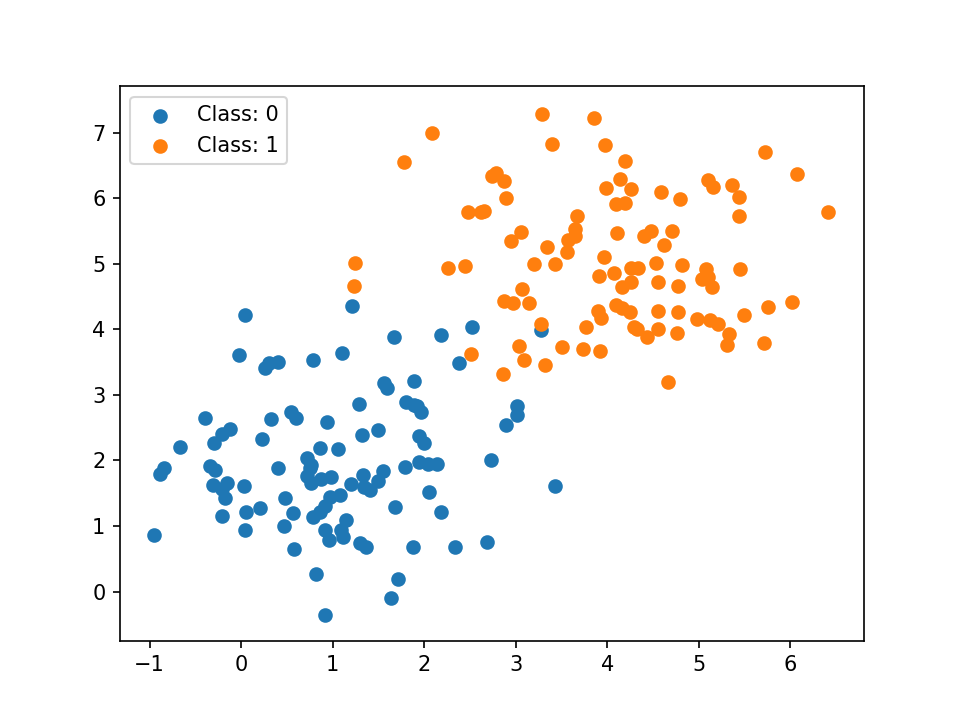

In [5]:
%matplotlib notebook
X, y = make_blobs(n_samples=[100, 100], n_features=2, centers=[[1,2], [4,5]])
for c in set(y): 
    plt.scatter(X[y==c][:,0], X[y==c][:,1], label="Class: {}".format(c))
plt.legend()

In [6]:
135-54


81

### 1. Calculating the mean of all points
### 2. Subtracting the mean from all the points (mean-centering the data)
### 3. Caluclating the Covariance Matrix for the points

In [22]:
# 1
means = out.mean(axis=0)
# 2
mean_shifted_data = out - means
# 3
covariance_matrix = cov(mean_shifted_data.T)

In [23]:
covariance_matrix

array([[2.99273307, 2.15325044],
       [2.15325044, 3.38056705]])

### 4. Calculating the Eigenvalues and Eigenvectors

In [48]:
eigvals, eigvectors = eig(covariance_matrix)
eigvectors

array([[-0.73813779, -0.67464998],
       [ 0.67464998, -0.73813779]])

### 5. Order the axis in the descending order of the eigenvalues

In [89]:
eigvals_idx_n_largest = \
    [x[1] for x in sorted(list(zip(eigvals, list(range(len(eigvals))))), key=lambda x: x[1], reverse=True)]


# Switch the columns in descending order corresponding to their 
# Eigenvalues
eigvectors_sorted_to_eigvals = eigvectors[:,eigvals_idx_n_largest]
print(eigvectors)
eigvectors_sorted_to_eigvals

[[-0.73813779 -0.67464998]
 [ 0.67464998 -0.73813779]]


array([[-0.67464998, -0.73813779],
       [-0.73813779,  0.67464998]])

### 6. Transform the data by multiplying it with the first n eigenvectors 

##### 6.1 Matrix-Multiplying with the transpose of the eigenvector-matrix from the left side ...

In [112]:
transformed_data = eigvectors_sorted_to_eigvals.T @ mean_shifted_data.T

##### 6.2 The values on the covariance matrix of the transformed data (apart from the values on the diagonal) are zero now

In [139]:
np.round(np.cov(transformed_data), 10)

array([[ 5.34861474, -0.        ],
       [-0.        ,  1.02468538]])

#### 6.3 .. Equals to mutliplying the data with the eigenvector-matrix from the right-side

In [117]:
assert np.sum(
    transformed_data - (mean_shifted_data @ eigvectors_sorted_to_eigvals).T
) == 0

### 7. Create the "rotated" eigenvectors for control

In [93]:
eigvectors_transformed = eigvectors.T @ eigvectors
eigvals_sorted = sorted(eigvals, reverse=True)
eigvals_sorted

[5.348614738190005, 1.0246853835001137]

### 8. Insight: Mutliplying the Eigenvector-Matrix by itself produces the Identity

In [102]:
eigvectors.T @ eigvectors 

array([[1., 0.],
       [0., 1.]])

### 9. Insight: Scaling the Identity with the eigenvalues results in "scaled" arrows where the length corresponds to the variance in each direction

In [103]:
(eigvectors.T @ eigvectors )* eigvals

array([[1.02468538, 0.        ],
       [0.        , 5.34861474]])

## What does the plot show: 
* The original points in 2D (blue dots)
* The eigenvectors scaled by their corresponding eigenvalues (red arrows)
* The data after multiplying it with the transposed eigenvector-matrix (the columns of the eigenvector matrix are sorted in descending order of the eigenvalues) in red
* The eigenvector-matrix transformed by itself (rotating the eigenvector-matrix) as green arrows. 
    * Mutiplying the eigenvector matrix by itself *aligns* the eigenvecotrs to the axis, meaning it produces the identity. If the identity is then scaled by the eigenvalues, the original eigenvector-matrix is transformed into the x- and y-axis with the lenght of the arrows indicating the amount of variance in each direction

<IPython.core.display.Javascript object>


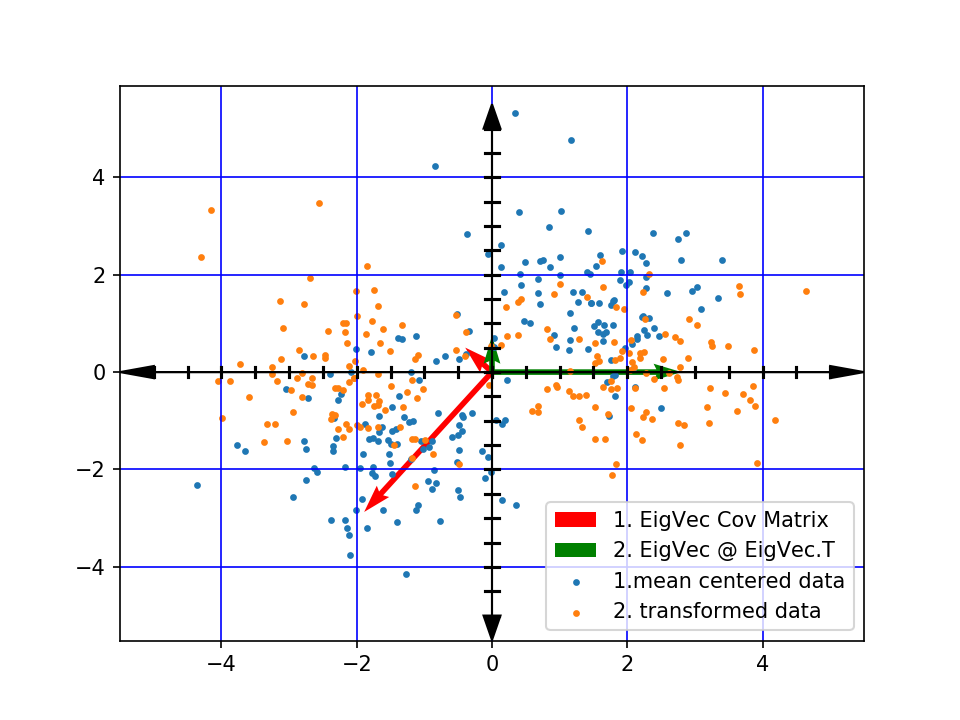

/home/alexander/mlactive/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



In [147]:
%matplotlib notebook 

import matplotlib.pyplot as plt

scatter2D = lambda x, c=None, label=None: plt.scatter(x[:,0], x[:,1], s=5, c=c, label=label)

def build_cartesian_plane(max_quadrant_range):
    """ The quadrant range controls the range of the quadrants"""
    l = []
    zeros = []
    plt.grid(True, color='b', zorder=0,)
    ax = plt.axes()
    head_width = float(0.05) * max_quadrant_range
    head_length = float(0.1) * max_quadrant_range
    ax.arrow(0, 0, max_quadrant_range, 0, head_width=head_width, head_length=head_length, fc='k', ec='k',zorder=100)
    ax.arrow(0, 0, -max_quadrant_range, 0, head_width=head_width, head_length=head_length, fc='k', ec='k', zorder=100)
    ax.arrow(0, 0, 0, max_quadrant_range, head_width=head_width, head_length=head_length, fc='k', ec='k', zorder=100)
    ax.arrow(0, 0, 0, -max_quadrant_range, head_width=head_width, head_length=head_length, fc='k', ec='k', zorder=100)
    counter_dash_width = max_quadrant_range * 0.02
    dividers = [0,.1,.2,.3,.4, .5, .6, .7, .8, .9, 1]
    for i in dividers:
        plt.plot([-counter_dash_width, counter_dash_width], [i*max_quadrant_range, i*max_quadrant_range], color='k')
        plt.plot([i * max_quadrant_range, i*max_quadrant_range], [-counter_dash_width, counter_dash_width], color='k')
        plt.plot([-counter_dash_width, counter_dash_width], [-i * max_quadrant_range, -i * max_quadrant_range], color='k')
        plt.plot([-i * max_quadrant_range, -i * max_quadrant_range], [-counter_dash_width, counter_dash_width], color='k')
        l.append(i * max_quadrant_range)
        l.append(-i * max_quadrant_range)
        zeros.append(0)
        zeros.append(0)


build_cartesian_plane(5)
origin = [0, 0]


for i in range(eigvectors.shape[1]):
    curr_eigvec, curr_eigval = eigvectors[:,i], eigvals[i]
    if i == 0: 
        label = "1. EigVec Cov Matrix"
    else:
        label = None
    plt.quiver(*origin, *(curr_eigval * curr_eigvec), color=['r'], scale=21, label=label)

    
for i in range(eigvectors_transformed.shape[1]):
    if i == 0: 
        label = "2. EigVec @ EigVec.T"
    else:
        label = None
    curr_eigvec, curr_eigval = eigvectors_transformed[:,i], eigvals_sorted[i]
    plt.quiver(*origin, *(curr_eigval * curr_eigvec), color=['g'], scale=21, label=label)


scatter2D(mean_shifted_data, label="1.mean centered data")
scatter2D(transformed_data.T, label="2. transformed data")
plt.legend()
plt.show()